In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### K - means algorithm

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```

* The inner-loop of the algorithm repeatedly carries out two steps: 
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    m = X.shape[0] # number of examples
    idx = np.zeros(m, dtype=int) # shape is (m,)
    
    for i in range(m):
      # distances = np.linalg.norm(centroids - X[i, :], axis=1) # shape is (k,) less optimized due to square root overhead in L2 norm
      distances =  np.sum(np.square(centroids - X[i, :]), axis=1) # shape is (k,)
      idx[i] = np.argmin(distances) # 0 based indexing of centroids position
    return idx

In [4]:
X = np.load("data/data-kmeans.npy")
print(X[:5])
print(X.shape)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
(300, 2)


In [5]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]) # 3 centroids

idx = find_closest_centroids(X, initial_centroids)
print(idx[:5])
print(idx.shape)

[0 2 1 0 0]
(300,)


In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx == k, :], axis=0)
    
    return centroids
  

In [7]:
K = 3 
centroids = compute_centroids(X, idx, K)
print(f"centroids:\n {centroids}")

centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [8]:
from unsup_utils import plot_progress_kMeans

In [9]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


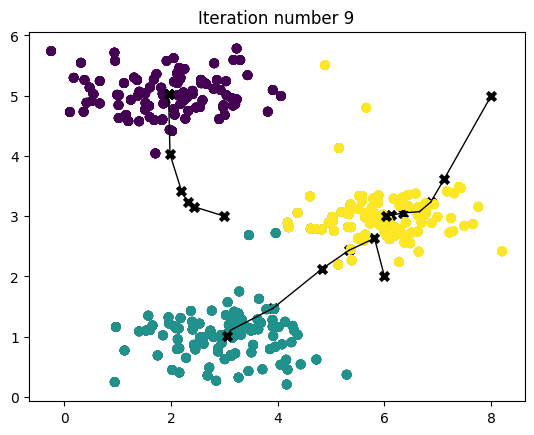

In [10]:
X = np.load('data/data-kmeans.npy')

initial_centroids = np.array([[3,3], [6, 2], [8,5]])
K = 3
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

#### Random initialization of cluster centroids

In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In [11]:
def KMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    # randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # select first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

#### Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.


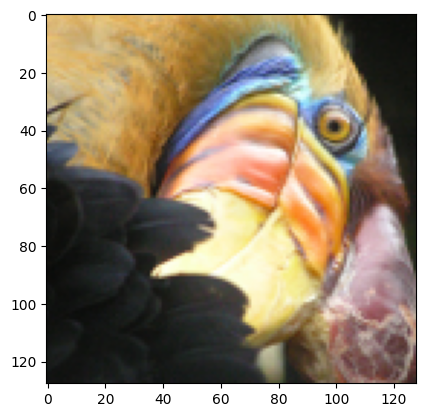

In [12]:
img = plt.imread('data/bird_small.png')
plt.imshow(img)
plt.show()

In [13]:
print("Shape of original_img is:", img.shape)

Shape of original_img is: (128, 128, 3)


As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [14]:
# normalize the image matrix (all pixel intensity values are in range 0 - 1)
img = img / 255

X_img = np.reshape(img, (img.shape[0]*img.shape[1], 3))

In [15]:
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = KMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [16]:
print(f"shape of idx: {idx.shape}")
print(f"closest centroid for the first five elements: f{idx[:5]}")

shape of idx: (16384,)
closest centroid for the first five elements: f[0 0 0 0 0]


#### compress the image

After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [17]:
# represent image in terms of indices
X_recovered = centroids[idx, :]

# reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, img.shape)

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the mean of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

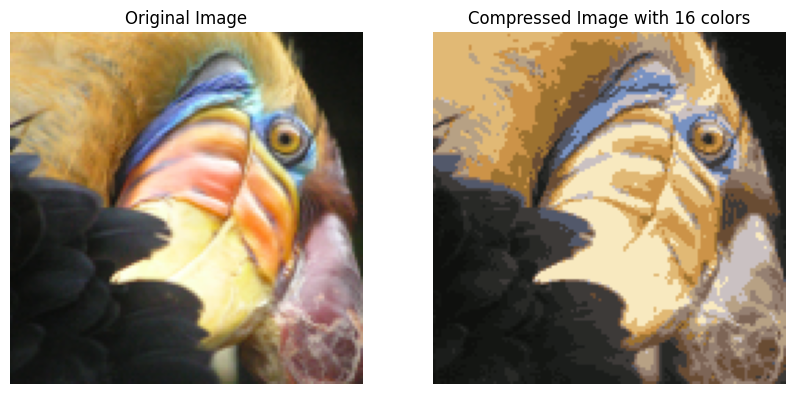

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
plt.axis('off')

ax[0].imshow(img*255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed Image with %d colors' %K)
ax[1].axis('off')

plt.show()

### anamoly detection

In this exercise, you will implement an anomaly detection algorithm to
detect anomalous behavior in server computers.

The dataset contains two features - 
   * throughput (mb/s) and 
   * latency (ms) of response of each server.

While your servers were operating, you collected $m=307$ examples of how they were behaving, and thus have an unlabeled dataset $\{x^{(1)}, \ldots, x^{(m)}\}$. 
* You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.

You will use a Gaussian model to detect anomalous examples in your
dataset. 
* You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing.
* On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. 
* After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions. 

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into the variables `X_train`, `X_val` and `y_val` 
    - You will use `X_train` to fit a Gaussian distribution 
    - You will use `X_val` and `y_val` as a cross validation set to select a threshold and determine anomalous vs normal examples


In [19]:
from utils_anamoly import load_data, load_data_multi

In [ ]:
X_train, X_val, y_val = load_data() 
#TODO: if this is unsupervised, then why y_val is there?

In [22]:
print("first 5 elements of X_train are:\n", X_train[:5])
print("\n")
print("first 5 elements of X_val are:\n", X_val[:5])
print("\n")
print("first 5 elements of y_val are:\n", y_val[:5])

first 5 elements of X_train are:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]


first 5 elements of X_val are:
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]


first 5 elements of y_val are:
 [0 0 0 0 0]


In [23]:
print("shape of X_train: ", X_train.shape)
print("shape of X_val: ", X_val.shape)
print("shape of y_val: ", y_val.shape)

shape of X_train:  (307, 2)
shape of X_val:  (307, 2)
shape of y_val:  (307,)


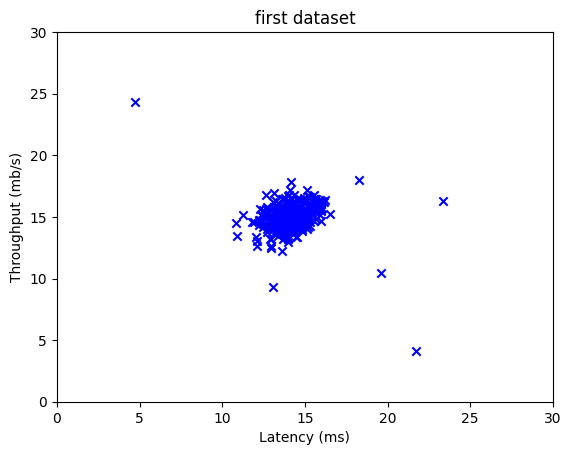

In [24]:
# plot the dataset
plt.scatter(X_train[:,0], X_train[:,1], c='blue', marker='x', label='Train')
plt.title("first dataset")
plt.ylabel("Throughput (mb/s)")
plt.xlabel("Latency (ms)")
plt.axis([0, 30, 0, 30])
plt.show()

#### Gaussian distribution

To perform anomaly detection, you will first need to fit a model to the data’s distribution.

* Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each of the features $x_i$. 

* Recall that the Gaussian distribution is given by

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   where $\mu$ is the mean and $\sigma^2$ controls the variance.
   
* For each feature $i = 1\ldots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (the $i$-th dimension of each example).

Please complete the `estimate_gaussian` function below to calculate `mu` (mean for each feature in `X`)and `var` (variance for each feature in `X`). 

You can estimate the parameters, ($\mu_i$, $\sigma_i^2$), of the $i$-th
feature by using the following equations. To estimate the mean, you will
use:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [27]:
def estimate_gaussian(X):
    """
    Calculates mean and variance of all features 
    in the dataset
    Input:
        X: (ndarray): (m, n): Data matrix
    Returns:
        mu: (ndarray): (n,): Mean of all features
        var: (ndarray): (n,): Variance of all features
    """
    # m, n = X.shape
    mu = np.mean(X, axis=0) # shape is (n,) or 1/m * np.sum(X, axis=0)
    var = np.var(X, axis=0) # shape is (n,) or 1/m * np.sum((X-mu)**2, axis=0)
    return mu, var
    
    


In [28]:
mu, var = estimate_gaussian(X_train)

print("mean of each feature:", mu)
print("variance of each feature:", var)

mean of each feature: [14.11222578 14.99771051]
variance of each feature: [1.83263141 1.70974533]


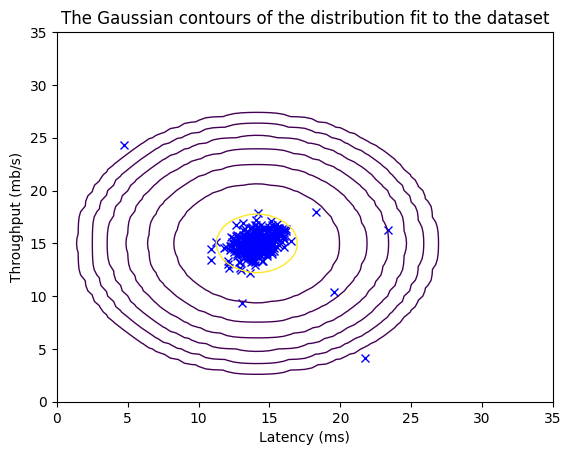

In [ ]:
from utils_anamoly import visualize_fit, multivariate_gaussian

# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X_train, mu, var)
# TODO: understand working of multivariate_gaussian

#Plotting code 
visualize_fit(X_train, mu, var)

see that most of the examples are in the region with the highest probability, while the anomalous examples are in the regions with lower probabilities.

In [30]:
p.shape

(307,)

#### Selecting the threshold $\epsilon$

Now that you have estimated the Gaussian parameters, you can investigate which examples have a very high probability given this distribution and which examples have a very low probability.  

* The low probability examples are more likely to be the anomalies in our dataset. 
* One way to determine which examples are anomalies is to select a threshold based on a cross validation set. 

In this section, you will code in `select_threshold` to select the threshold $\varepsilon$ using the $F_1$ score on a cross validation set.

* For this, we will use a cross validation set
$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$, where the label $y=1$ corresponds to an anomalous example, and $y=0$ corresponds to a normal example. 
* For each cross validation example, we will compute $p(x_{\rm cv}^{(i)})$. The vector of all of these probabilities $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv)}})$ is passed to `select_threshold` in the vector `p_val`. 
* The corresponding labels $y_{\rm cv}^{(1)}, \ldots, y_{\rm cv}^{(m_{\rm cv)}}$ is passed to the same function in the vector `y_val`.


Please complete the `select_threshold` function below to find the best threshold to use for selecting outliers based on the results from a validation set (`p_val`) and the ground truth (`y_val`). 

* In the provided code `select_threshold`, there is already a loop that will try many different values of $\varepsilon$ and select the best $\varepsilon$ based on the $F_1$ score. 

* You need implement code to calculate the F1 score from choosing `epsilon` as the threshold and place the value in `F1`. 

  * Recall that if an example $x$ has a low probability $p(x) < \varepsilon$, then it is classified as an anomaly. 
        
  * Then, you can compute precision and recall by: 
   $$\begin{aligned}
   prec&=&\frac{tp}{tp+fp}\\
   rec&=&\frac{tp}{tp+fn},
   \end{aligned}$$ 
   
   where
    * $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.
    * $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
    * $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.

  * The $F_1$ score is computed using precision ($prec$) and recall ($rec$) as follows:
    $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$ 

**Implementation Note:** 
In order to compute $tp$, $fp$ and $fn$, you may be able to use a vectorized implementation rather than loop over all the examples.

In [35]:
def select_threshold(y_val, p_val):
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    stepsize = (max(p_val) - min(p_val))/ 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), stepsize):
      predictions = (p_val < epsilon) # 1 is anamoly, 0 is normal
      tp = np.sum((predictions == 1) & (y_val == 1))
      fp = np.sum((predictions ==1) & (y_val == 0))
      fn = np.sum((predictions == 0) & (y_val == 1))
      
      # division by zero check
      prec = tp / (tp + fp) if (tp + fp) > 0 else 0
      rec = tp / (tp + fn) if (tp + fn) > 0 else 0

      F1 = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0
      if F1 > best_F1:
        best_F1 = F1
        best_epsilon = epsilon
    return best_epsilon, best_F1
  

In [36]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


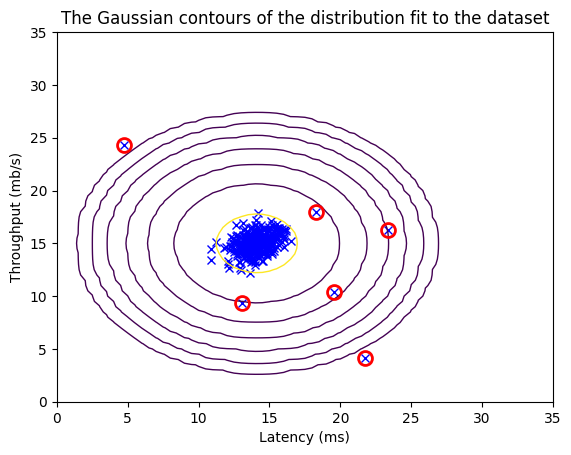

In [38]:
outliers = p < epsilon

# visualization of fit
visualize_fit(X_train, mu, var)

# draw a red circle around these outliers
plt.plot(X_train[outliers,0], X_train[outliers, 1], 'ro', markersize=10, markerfacecolor='none', markeredgewidth=2)

#### High dimensional dataset

Now,  we will run the anomaly detection algorithm that you implemented on a more realistic and much harder dataset.

In this dataset, each example is described by 11 features, capturing many more properties of your compute servers.

Let's start by loading the dataset.

- The `load_data()` function shown below loads the data into variables `X_train_high`, `X_val_high` and `y_val_high`
    -  `_high` is meant to distinguish these variables from the ones used in the previous part
    - We will use `X_train_high` to fit Gaussian distribution 
    - We will use `X_val_high` and `y_val_high` as a cross validation set to select a threshold and determine anomalous vs normal examples

In [39]:
X_train_high, X_val_high, y_val_high = load_data_multi()

In [40]:
print ('The shape of X_train_high is:', X_train_high.shape)
print ('The shape of X_val_high is:', X_val_high.shape)
print ('The shape of y_val_high is: ', y_val_high.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


Now, let's run the anomaly detection algorithm on this new dataset.

The code below will use your code to 
* Estimate the Gaussian parameters ($\mu_i$ and $\sigma_i^2$)
* Evaluate the probabilities for both the training data `X_train_high` from which you estimated the Gaussian parameters, as well as for the the cross-validation set `X_val_high`. 
* Finally, it will use `select_threshold` to find the best threshold $\varepsilon$. 

In [42]:
# estimate guassian parameters
mu_high, var_high = estimate_gaussian(X_train_high)

# evaluate probabilities for training set
p_high = multivariate_gaussian(X_train_high, mu_high, var_high)

# evaluate probabilities for cross validation set
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)

# find best threshold
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print(f"best epsilon found using cross-validation: {epsilon_high}")
print(f"best F1 on Cross Validation Set: {F1_high}")
print(f"number of anomalies found: {sum(p_high < epsilon_high)}")

best epsilon found using cross-validation: 1.377228890761358e-18
best F1 on Cross Validation Set: 0.6153846153846154
number of anomalies found: 117


In [ ]:
# dummy